<a href="https://colab.research.google.com/github/tocom242242/anomaly_detection/blob/main/fashion_mnist/only_one_class_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras import datasets, layers, models
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
x_train = x_train / 255
x_test = x_test / 255

In [4]:
normal_idx = 5
abnormal_idx = 7

In [5]:
x_normal_train = x_train[np.where(y_train==normal_idx,True,False)]
x_normal_test = x_test[np.where(y_test==normal_idx,True,False)]

In [6]:
x_abnormal_train = x_train[np.where(y_train==abnormal_idx,True,False)]
x_abnormal_test = x_test[np.where(y_test==abnormal_idx,True,False)]

In [7]:
# normalが1,異常が0
y_test = np.concatenate((np.ones(x_normal_test.shape[0]),np.zeros(x_abnormal_test.shape[0])))

In [8]:
x_test = np.concatenate((x_normal_test,x_abnormal_test))

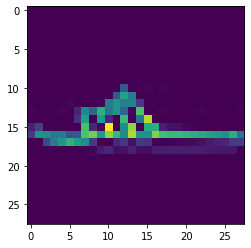

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_normal_train[80])

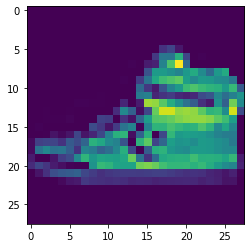

In [10]:
plt.imshow(x_abnormal_train[80])

In [11]:
x_test = x_test.reshape(x_test.shape[0], 28*28)
x_normal_train = x_normal_train.reshape(x_normal_train.shape[0], 28*28)

## 異常検知

In [12]:
from sklearn.svm import OneClassSVM

svm = OneClassSVM()
svm.fit(x_normal_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='scale', kernel='rbf',
            max_iter=-1, nu=0.5, shrinking=True, tol=0.001, verbose=False)

In [13]:
y_score = svm.decision_function(x_test)
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,y_score)
auc

0.509236

In [14]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)

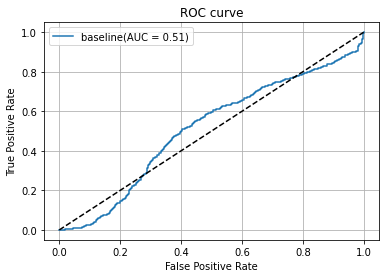

In [15]:
plt.plot(fpr, tpr, label='baseline(AUC = %.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

In [16]:
y_pred = svm.predict(x_test)
y_pred

array([ 1,  1,  1, ..., -1, -1, -1])

In [17]:
y_pred = np.where(y_pred==-1,0,1)
# y_pred = np.where(y_pred==-1,1,0)

In [18]:
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [19]:
y_test

array([1., 1., 1., ..., 0., 0., 0.])

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[597, 403],
       [495, 505]])

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.55      0.60      0.57      1000
         1.0       0.56      0.51      0.53      1000

    accuracy                           0.55      2000
   macro avg       0.55      0.55      0.55      2000
weighted avg       0.55      0.55      0.55      2000



In [22]:
# plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred, cmap=cm.seismic)
# plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred)
# plt.colorbar()
